In [1]:
import json
from pathlib import Path


{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

In [15]:
root_folder = Path.cwd().parent. parent
geo_folder = Path(root_folder).joinpath('data',  'external',  'RegionsShapefiles')

files = list(Path(geo_folder).glob('*'))


In [16]:
files

[PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Foundiougne.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Koungheul.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Bounkiling.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Diourbel.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Saint-Louis.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Birkilane.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Kaffrine.geojson'),
 PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/RegionsShapefiles/Guinguinéo.geojson

In [93]:
unit_dict = {'type': 'FeatureCollection', 'features': []}

for file in files:
    loaded_name = str(file).split('/')[-1].split('.')[0]
    unit_name = ds.match_unit(loaded_name, unit_names)
    unit_code = units[units['adm2_name'] == unit_name]['code'].values[0]
    with open(file) as f:
        loaded_feature = json.load(f)
    if len(loaded_feature['features']) > 1:
        print("More than one feature. Stopping...")
        break
    loaded_feature = loaded_feature['features'][0]
    loaded_feature['properties']['NAME'] = unit_name
    loaded_feature['properties']['COUNTY'] = unit_code
    loaded_feature['geometry']['id'] = unit_code
    unit_dict['features'].append(loaded_feature)




In [64]:
len(unit_dict['features'])

45

In [108]:
df_y.columns = ['fips', 'severity']

In [98]:
# fig = px.choropleth_mapbox(df_y,
#                            geojson=unit_dict,
#                            locations='fips',
#                            color='severity',
#                            mapbox_style="carto-positron",
#                            opacity=1,
#                            labels={'severity':'severity'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()



In [85]:
import geopandas as gpd


<AxesSubplot:>

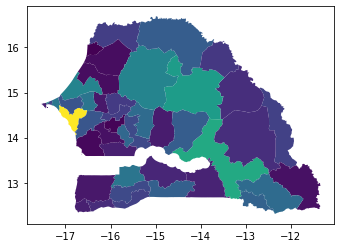

In [118]:
df_y = ds.df_y.copy()
df_y =  df_y.xs(2019)
df_y.reset_index(inplace=True)
df_y = df_y[['adm2_name_code', 'severity']]
df_unit = gpd.GeoDataFrame.from_features(unit_dict)
df_unit = df_unit.join(df_y)

df_unit.plot(column='severity')

In [123]:
df_y = ds.df_y.copy()
df_y =  df_y.xs(2017)
df_y.reset_index(inplace=True)
df_y

,adm2_name_code,severity,phase1,phase2,phase3,phase4,phase5,sample
0,15,1.120000,0.880000,0.120000,0.000000,0.0,0.0,195
1,3,1.279999,0.760001,0.219999,0.020000,0.0,0.0,183
2,5,1.169999,0.830001,0.169999,0.000000,0.0,0.0,185
3,8,1.159999,0.840001,0.159999,0.000000,0.0,0.0,188
4,6,1.170000,0.830000,0.170000,0.000000,0.0,0.0,186
5,7,1.599999,0.600001,0.299999,0.100000,0.0,0.0,187
6,35,1.140000,0.860000,0.140000,0.000000,0.0,0.0,215
7,34,1.150000,0.850000,0.150000,0.000000,0.0,0.0,214
8,27,1.310004,0.729999,0.250000,0.020001,0.0,0.0,207
9,26,1.254998,0.755001,0.239999,0.004999,0.0,0.0,206


In [ ]:
df_y = df_y[['adm2_name_code', 'severity']]
df_unit = gpd.GeoDataFrame.from_features(unit_dict)
df_unit = df_unit.join(df_y)

df_unit.plot(column='severity')

In [106]:
ds.df_y


severity    phase1    phase2    phase3    phase4  \
season adm2_name_code                                                     
2013   0               1.439991  0.720001  0.200000  0.079999  0.000000   
       1               1.399998  0.740002  0.189998  0.070000  0.000000   
       2               1.309990  0.790004  0.159999  0.049997  0.000000   
       3               2.210003  0.350000  0.449999  0.160000  0.040001   
       4               1.320012  0.799997  0.140001  0.060002  0.000000   
...                         ...       ...       ...       ...       ...   
2019   1               1.190002  0.850000  0.129999  0.020001  0.000000   
       44              1.360000  0.740000  0.210000  0.050000  0.000000   
       15              1.120000  0.880000  0.120000  0.000000  0.000000   
       35              1.280000  0.820000  0.130000  0.050000  0.000000   
       31              1.154998  0.865001  0.124999  0.009999  0.000000   

                       phase5  sample  
season adm2_name_code                  
2013   0                  0.0       0  
       1                  0.0       1  
       2                  0.0       2  
       3                  0.0       3  
       4                  0.0       4  
...                       ...     ...  
2019   1                  0.0     271  
       44                 0.0     314  
       15                 0.0     285  
       35                 0.0     305  
       31                 0.0     301  

[297 rows x 7 columns]

In [104]:
ds = Dataset(root_folder=root_folder)

In [105]:
ds.prepare_dataset_array()

In [119]:
df_y

,adm2_name_code,severity
0,36,1.060000
1,39,1.110002
2,26,1.399999
3,23,1.100000
4,25,1.040000
5,24,1.350007
6,30,1.249997
7,40,1.050001
8,22,1.139998
9,16,1.410001


In [121]:
units


,code,adm1_name,adm2_name
0,0,Kolda,Velingara
1,1,Kolda,Kolda
2,2,Kolda,Medina Yoro Foulah
3,3,Louga,Louga
4,4,Louga,Linguere
5,5,Louga,Kebemer
6,6,Saint Louis,Dagana
7,7,Saint Louis,Podor
8,8,Saint Louis,Saint Louis
9,9,Matam,Ranerou


In [124]:
ds.df_y

severity    phase1    phase2    phase3    phase4  \
season adm2_name_code                                                     
2013   0               1.439991  0.720001  0.200000  0.079999  0.000000   
       1               1.399998  0.740002  0.189998  0.070000  0.000000   
       2               1.309990  0.790004  0.159999  0.049997  0.000000   
       3               2.210003  0.350000  0.449999  0.160000  0.040001   
       4               1.320012  0.799997  0.140001  0.060002  0.000000   
...                         ...       ...       ...       ...       ...   
2019   1               1.190002  0.850000  0.129999  0.020001  0.000000   
       44              1.360000  0.740000  0.210000  0.050000  0.000000   
       15              1.120000  0.880000  0.120000  0.000000  0.000000   
       35              1.280000  0.820000  0.130000  0.050000  0.000000   
       31              1.154998  0.865001  0.124999  0.009999  0.000000   

                       phase5  sample  
season adm2_name_code                  
2013   0                  0.0       0  
       1                  0.0       1  
       2                  0.0       2  
       3                  0.0       3  
       4                  0.0       4  
...                       ...     ...  
2019   1                  0.0     271  
       44                 0.0     314  
       15                 0.0     285  
       35                 0.0     305  
       31                 0.0     301  

[297 rows x 7 columns]